In [1]:
from quantipy.assets import Currency, Equity
from quantipy.trading import Position

# Creating a currency object
usd = Currency('USD')
print('Currency: ', usd.currency)
print('Is cash?: ', usd.is_cash)

print('\n')

# Creating an Equity object
aapl = Equity(name='Apple', symbol='AAPL')
print('Stock name: ', aapl.name)
print('Symbol: ', aapl.symbol)
print('Is cash?: ', aapl.is_cash)

# Creating positions
eur = Currency('EUR')
cash_position = Position(eur, 10_000)
boeing = Equity('Boeing', 'BA')
boeing_position = Position(boeing, 10_000)

Currency:  USD
Is cash?:  True


Stock name:  Apple
Symbol:  AAPL
Is cash?:  False


In [2]:
from quantipy.trading import Order, Trade, Broker
import yfinance as yf

ba = yf.ticker.Ticker('BA')
data1 = ba.history(start='2024-01-01', end='2024-03-01')
aapl = yf.ticker.Ticker('AAPL')
data2 = aapl.history()
data = {'BA':data1, 'AAPL':data2}

In [3]:
# Creating our broker with 10k euros initial capital
my_broker = Broker(data=data, initial_capital=10_000, currency=eur)

# Creating a new order for half of our equity on Boeing
my_broker._new_order(boeing, 0.5)
print('Outstanding orders: ', my_broker.orders)
my_broker._process_orders()

Outstanding orders:  [<quantipy.trading.Order object at 0x7f85f5284510>]


In [4]:
print('Outstanding orders: ', my_broker.orders)
print('Open trades: ', my_broker.trades)
print('Open positions: ', my_broker.positions)

Outstanding orders:  []
Open trades:  [<quantipy.trading.Trade object at 0x7f8600c51290>]
Open positions:  []


In [5]:
current_trade = my_broker.trades[0]

my_broker._new_order(boeing, -15, parent_trade=current_trade)
my_broker.orders

my_broker._process_orders()

In [6]:
current_trade.size

9.0

In [7]:
my_broker.orders
my_broker._new_order(boeing, -14, parent_trade=current_trade)


In [8]:
my_broker._process_orders()

my_broker.trades
my_broker.closed_trades

In [9]:
from quantipy.trading import Strategy
from quantipy.backtest import Backtester

class TestStrategy(Strategy):
    def __init__(self, broker, asset, tp=210, sl=200, stop=205):
        super().__init__(broker)
        self.__asset = asset
        self.__tp = tp
        self.__sl = sl
        self.__stop = stop
    
    @property
    def asset(self):
        return self.__asset 
    
    def next(self):
        if self._Strategy__broker.orders == [] and self._Strategy__broker.last_price(self.__asset) < 205:
            self.buy(self.__asset,
                     stop_loss=self.__sl,
                     take_profit=self.__tp)
            print('order set')

my_broker = Broker(data=data, initial_capital=10_000, currency=eur)
strategy = TestStrategy(my_broker, boeing)

backtester = Backtester(data)
eq = backtester.run(strategy)

eq

251.75999450683594
[]
243.91000366210938
[]
244.94000244140625
[]
249.0
[]
229.0
[]
225.75999450683594
[]
227.83999633789062
[]
222.66000366210938
[]
217.6999969482422
[]
200.52000427246094
[]
order set
203.05999755859375
order set
211.61000061035156
215.02000427246094
214.92999267578125
211.5
214.1300048828125
201.8800048828125
order set
205.47000122070312
205.19000244140625
200.44000244140625
order set
211.0399932861328
209.80999755859375
209.3800048828125
206.6300048828125
208.5800018310547
211.9199981689453
209.22000122070312
209.1999969482422
209.3300018310547
204.4600067138672
order set
203.3800048828125
order set
205.3300018310547
203.88999938964844
order set
203.3699951171875
order set
201.57000732421875
order set
201.5
order set
200.8300018310547
order set
200.5399932861328
order set
201.39999389648438
order set
207.0


array([10000.        , 10000.        , 10000.        , 10000.        ,
       10000.        , 10000.        , 10000.        , 10000.        ,
       10000.        , 10000.        ,  9972.06964111, 10391.01979065,
       10558.10997009, 10553.69940186, 10385.62976074, 10514.5       ,
        9914.25      , 10090.15982056, 10076.43988037,  9843.68988037,
       10363.08943176, 10302.81964111, 10281.75      , 10147.        ,
       10242.54985046, 10406.20967102, 10273.90982056, 10272.92961121,
       10279.29985046, 10040.67008972,  9987.75      , 10083.29985046,
       10012.73973083,  9987.25952148,  9899.06011963,  9895.62976074,
        9862.79985046,  9848.58943176,  9890.72946167, 10165.12976074])

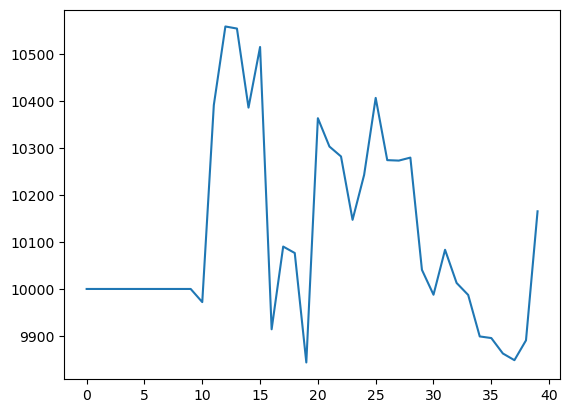

In [10]:
import matplotlib.pyplot as plt
plt.plot(eq)